In [ ]:
%pip install cadquery

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from lensless.hardware.mask import FresnelZoneAperture
from lensless.hardware.mask_3dmodel import Mask3DModel, SimpleFrame, SaltireConnection

distanse_sensor = 10e-6
radius = 0.7e-3
downsample = 16
simplify = True # simplifying the model into one solid object takes a considerable amount of time. But makes post processing easier.

mask = FresnelZoneAperture.from_sensor(
    sensor_name="rpi_hq", downsample=downsample, distance_sensor=distanse_sensor, radius=radius
)

mask_model = Mask3DModel.from_mask(mask, 
    frame = SimpleFrame(), 
    connection = SaltireConnection(thickness=0.1, mask_radius=radius*1e3), 
    depth=1, 
    simplify=simplify
)

from datetime import datetime
date_str = datetime.now().strftime("%d.%m.%Y-%H.%M")
mask_model.save(f"out/fza_downsample{downsample}_radius{radius*1000:.2f}mm{'_min' if simplify else ''}_{date_str}.stl")

display(mask_model.model)

(47, 63)


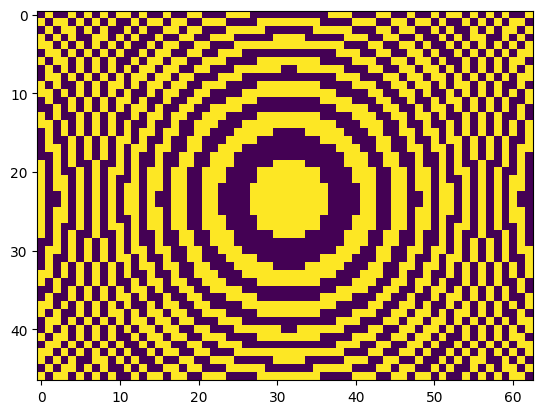

In [9]:
import matplotlib.pyplot as plt
print(mask.mask.shape)
plt.imshow(mask.mask)